# Project 12 - The Best Model to Determine the Price of a Car

## Project Description

Rusty Bargain is a secondhand car company that is developing an app to attract new buyers. In the app, the customers can quickly find out the market value of the car. We have access to historical data, vehicle specifications, vehicle model and vehicle prices. We need to create a model that determines the market value of the car.

### Aim of task
- Prediction quality
- Prediction speed
- Training model time needed

### Steps of the Project
1. Initialization
2. Data Pre-Processing
3. Explorative Data Analysis
4. Data Encoding for Modelling
5. Model Training and Analysis
6. Conclusion

### Data Description
Data Feature :
- `DateCrawled` — date of profile that was downloaded from database
- `VehicleType` — vehicle body type
- `RegistrationYear` — year of registration
- `Gearbox` — transmission type
- `Power` — power (hp)
- `Model` — vehicle model
- `Mileage` — mileage (in km based on regional)
- `RegistrationMonth` — month of registration
- `FuelType` — fuel type
- `Brand` — vehicle brand
- `NotRepaired` — repaired or not yet
- `DateCreated` — date of new profile
- `NumberOfPictures` — picture of vehicle
- `PostalCode` — postal code (owner)
- `LastSeen` — date of last activity (user)

Target
- `Price` — vehicle price (in Euro)

## Initialization

In [1]:
!pip install sidetable
!pip install missingno
!pip install catboost

In [2]:
#Common Library
import pandas as pd
import numpy as np
import sidetable as stb
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from collections import defaultdict
import warnings
warnings.simplefilter('ignore')
import missingno as msno

#Machine learning
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgbm
import catboost as cb

## Data Overview

In [3]:
df = pd.read_csv('moved_car_data.csv')

table = pd.DataFrame

In [4]:
# Data sample
df.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
5,04/04/2016 17:36,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,04/04/2016 00:00,0,33775,06/04/2016 19:17
6,01/04/2016 20:48,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,01/04/2016 00:00,0,67112,05/04/2016 18:18
7,21/03/2016 18:54,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,21/03/2016 00:00,0,19348,25/03/2016 16:47
8,04/04/2016 23:42,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,04/04/2016 00:00,0,94505,04/04/2016 23:42
9,17/03/2016 10:53,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,17/03/2016 00:00,0,27472,31/03/2016 17:17


In [5]:
#information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
#null data check
df.isnull().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [7]:
#statstical description of data
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


**Findings :**
- Some columns had null data, further checking is required
- The lowest price of a car was 0, with 0 HP and 1000 registration year, which is impossible or forget about an information of a car
- The highest price of a car was 20.000, with 20.000 HP, and 9999 registration year. it's probably error while loading data
- Some columns need to be discharged such as numberofpictures that has no number.

## Data Pre-Processing 

### Lowercase and Discharged Columns

In [8]:
# lowercase the columns
df.columns = df.columns.str.lower()
df.head()

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


In [9]:
#discharged columns
df = df.drop(['datecrawled', 'datecreated', 'numberofpictures', 'postalcode', 'lastseen'], axis=1)
df.head()

,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


### Anomaly Value Checking

**Power**

In [10]:
#value 0 of power
df[df['power']==0].value_counts().sum()

9612

In [11]:
#value > 1600 hp of power (based on max HP of a car)
df[df['power']>=1600].value_counts().sum()

73

In [12]:
##value > 1600 hp of power (based on min HP of a car in 1900s)
df[df['power']<=10].value_counts().sum()

9651

**Value 'Other'**

In [13]:
#in vehicle type
df[df['vehicletype']=='other'].value_counts().sum()

1741

In [14]:
#in model
df[df['model']=='other'].value_counts().sum()

18480

In [15]:
#in fuel type
df[df['fueltype']=='other'].value_counts().sum()

73

In [16]:
#in brand
df[df['brand']=='other'].value_counts().sum()

0

**Registration Year**

In [17]:
#value of >1900
df[df['registrationyear'] <= 1900]

,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired
622,0,NaN,1111,NaN,0,NaN,5000,0,NaN,opel,NaN
16062,190,NaN,1000,NaN,0,mondeo,5000,0,NaN,ford,NaN
18224,7999,NaN,1500,manual,224,impreza,5000,3,NaN,subaru,NaN
34332,450,NaN,1800,NaN,1800,NaN,5000,2,NaN,mitsubishi,no
38875,1234,NaN,1234,NaN,26,NaN,5000,1,NaN,trabant,NaN
...,...,...,...,...,...,...,...,...,...,...,...
323443,30,NaN,1000,NaN,0,NaN,5000,0,NaN,audi,NaN
325739,400,NaN,1000,NaN,0,NaN,5000,0,NaN,mercedes_benz,NaN
340759,700,NaN,1600,manual,1600,a3,150000,4,petrol,audi,no
348830,1,NaN,1000,NaN,1000,NaN,150000,0,NaN,sonstige_autos,NaN


In [18]:
#value of >2025
df[df['registrationyear'] >= 2025]

,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired
12946,49,NaN,5000,NaN,0,golf,5000,12,NaN,volkswagen,NaN
15147,0,NaN,9999,NaN,0,NaN,10000,0,NaN,sonstige_autos,NaN
15870,1700,NaN,3200,NaN,0,NaN,5000,0,NaN,sonstige_autos,NaN
17271,700,NaN,9999,NaN,0,other,10000,0,NaN,opel,NaN
17346,6500,NaN,8888,NaN,0,NaN,10000,0,NaN,sonstige_autos,NaN
...,...,...,...,...,...,...,...,...,...,...,...
334967,12000,NaN,4000,NaN,500,golf,5000,0,NaN,volkswagen,no
335727,0,NaN,7500,manual,0,other,10000,0,petrol,mini,no
338829,50,NaN,3000,NaN,3000,golf,100000,6,NaN,volkswagen,yes
340548,0,NaN,3500,manual,75,NaN,5000,3,petrol,sonstige_autos,NaN


**Findings :**
- a lot of oddity in power colums such as 0, >1600, or <10 HP
- the columns that consume value 'other' will be consider as NaN values

**Solution :**
- power that has value 0 will be replace by NaN values, while value of >1600 and <10 HP will be discharged
- replace columns that have value 'other' to NaN values

### Replace and Discharged Anomaly Value

In [19]:
#discharged value
df = df[df['power'] < 1600]
df = df[df['power'] > 10]
df = df[df['registrationyear'] >= 1900]
df = df[df['registrationyear'] <= 2025]

df.reset_index()

,index,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired
0,1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
1,2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
2,3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
3,4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no
4,5,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
313682,354361,5250,NaN,2016,auto,150,159,150000,12,NaN,alfa_romeo,no
313683,354362,3200,sedan,2004,manual,225,leon,150000,5,petrol,seat,yes
313684,354366,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no
313685,354367,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no


In [20]:
#replace value to NaN
df.loc[df['power'] == 0, 'power'] = np.nan
df.loc[df['model'] == 'other', 'model'] = np.nan
df.loc[df['vehicletype'] == 'other', 'vehicletype'] = np.nan
df.loc[df['fueltype'] == 'other', 'fueltype'] = np.nan

In [21]:
df.describe()

,price,registrationyear,power,mileage,registrationmonth
count,313687.000000,313687.000000,313687.000000,313687.000000,313687.000000
mean,4705.887059,2003.247645,120.802561,128556.538843,5.934511
std,4591.438847,7.000712,59.280294,36742.508086,3.615483
min,0.000000,1910.000000,11.000000,5000.000000,0.000000
25%,1250.000000,1999.000000,75.000000,125000.000000,3.000000
50%,2999.000000,2003.000000,110.000000,150000.000000,6.000000
75%,6890.000000,2008.000000,150.000000,150000.000000,9.000000
max,20000.000000,2019.000000,1598.000000,150000.000000,12.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313687 entries, 1 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              313687 non-null  int64  
 1   vehicletype        288333 non-null  object 
 2   registrationyear   313687 non-null  int64  
 3   gearbox            307209 non-null  object 
 4   power              313687 non-null  float64
 5   model              279247 non-null  object 
 6   mileage            313687 non-null  int64  
 7   registrationmonth  313687 non-null  int64  
 8   fueltype           292446 non-null  object 
 9   brand              313687 non-null  object 
 10  notrepaired        264106 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 28.7+ MB


### Duplicate and Missing Values

**Duplicate Value**

In [23]:
df.duplicated().sum()

24398

In [24]:
#drop all duplicate
df.drop_duplicates(inplace=True)
df.reset_index()

,index,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired
0,1,18300,coupe,2011,manual,190.0,NaN,125000,5,gasoline,audi,yes
1,2,9800,suv,2004,auto,163.0,grand,125000,8,gasoline,jeep,NaN
2,3,1500,small,2001,manual,75.0,golf,150000,6,petrol,volkswagen,no
3,4,3600,small,2008,manual,69.0,fabia,90000,7,gasoline,skoda,no
4,5,650,sedan,1995,manual,102.0,3er,150000,10,petrol,bmw,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
289284,354361,5250,NaN,2016,auto,150.0,159,150000,12,NaN,alfa_romeo,no
289285,354362,3200,sedan,2004,manual,225.0,leon,150000,5,petrol,seat,yes
289286,354366,1199,convertible,2000,auto,101.0,fortwo,125000,3,petrol,smart,no
289287,354367,9200,bus,1996,manual,102.0,transporter,150000,3,gasoline,volkswagen,no


In [25]:
df.duplicated().sum()

0

**Missing Value**

In [26]:
df.isna().sum()

price                    0
vehicletype          24323
registrationyear         0
gearbox               6247
power                    0
model                32797
mileage                  0
registrationmonth        0
fueltype             20625
brand                    0
notrepaired          46969
dtype: int64

**Findings :**
- The missing value of 'vehicle type', 'gearbox', 'model', and 'fuel type' have some correlation from each other
- 'not repaired' only consist of 2 value, such as yes or no

**Solution :**
- Groupby data of each other that have correlation with the column that consist missing value, so we don't have to discharged the data or fill with mean or with median
- Missing value in 'not repaired' will be replace by unknown

In [27]:
df.isna().any(axis=1).mean() * 100

31.641023336525066

In [28]:
def fill_missing_values(dataset, target_column, reference_columns):
    dataset.loc[dataset[target_column].isna(), target_column] = dataset.groupby(reference_columns)[target_column].apply(lambda x: x.ffill().bfill())
    return dataset

In [29]:
%%time
# fill missing value in 'model' column based on 'brand', 'year', 'transmission', 'power', 'fuel'

target_column = 'model'
reference_columns = ['brand', 'registrationyear', 'power', 'gearbox', 'fueltype']

df_new = fill_missing_values(df, target_column, reference_columns)
df_new.head()

CPU times: user 20.5 s, sys: 315 ms, total: 20.8 s
Wall time: 20.8 s


,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired
1,18300,coupe,2011,manual,190.0,a4,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163.0,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75.0,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69.0,fabia,90000,7,gasoline,skoda,no
5,650,sedan,1995,manual,102.0,3er,150000,10,petrol,bmw,yes


In [30]:
%%time
# fill missing value in 'vehicle type' column based on 'model', 'year'

target_column = 'vehicletype'
reference_columns = ['model', 'registrationyear']

df_new = fill_missing_values(df_new, target_column, reference_columns)
df_new.head()

CPU times: user 2.71 s, sys: 52.5 ms, total: 2.76 s
Wall time: 2.77 s


,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired
1,18300,coupe,2011,manual,190.0,a4,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163.0,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75.0,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69.0,fabia,90000,7,gasoline,skoda,no
5,650,sedan,1995,manual,102.0,3er,150000,10,petrol,bmw,yes


In [31]:
%%time
# fill missing value in 'fuel type' column based on 'model', 'year', 'power'

target_column = 'fueltype'
reference_columns = ['model', 'registrationyear']

df_new = fill_missing_values(df_new, target_column, reference_columns)
df_new.head()

CPU times: user 2.87 s, sys: 85.7 ms, total: 2.95 s
Wall time: 2.97 s


,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired
1,18300,coupe,2011,manual,190.0,a4,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163.0,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75.0,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69.0,fabia,90000,7,gasoline,skoda,no
5,650,sedan,1995,manual,102.0,3er,150000,10,petrol,bmw,yes


In [32]:
%%time
# fill missing value in 'gearbox' column based on 'model', 'year', 'power'

target_column = 'gearbox'
reference_columns = ['model', 'registrationyear', 'power']

df_new = fill_missing_values(df_new, target_column, reference_columns)
df_new.head()

CPU times: user 18.3 s, sys: 305 ms, total: 18.6 s
Wall time: 18.6 s


,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired
1,18300,coupe,2011,manual,190.0,a4,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163.0,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75.0,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69.0,fabia,90000,7,gasoline,skoda,no
5,650,sedan,1995,manual,102.0,3er,150000,10,petrol,bmw,yes


In [33]:
# fill missing value in 'notrepaired' with unknown
df_new['notrepaired'].fillna('unknown', inplace=True)

In [34]:
df_new.isna().sum()

price                    0
vehicletype          12450
registrationyear         0
gearbox               1769
power                    0
model                18782
mileage                  0
registrationmonth        0
fueltype              4786
brand                    0
notrepaired              0
dtype: int64

In [35]:
missed_value = df_new.columns[df.isnull().any()]

df_new[missed_value].stb.missing(style=True)

,missing,total,percent
model,"18,782","289,289",6.49%
vehicletype,"12,450","289,289",4.30%
fueltype,"4,786","289,289",1.65%
gearbox,"1,769","289,289",0.61%


In [36]:
# missingg values ratio
df_new.isna().any(axis=1).mean() * 100

9.724185848753322

From 31% to 9% of missing values, we can discharged the remaining missing value because it won't impact the whole dataset

In [37]:
df_new.dropna(inplace=True)
df_new.shape

(261158, 11)

## Explorative Data Analysis

In [38]:
df_new.head()

,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired
1,18300,coupe,2011,manual,190.0,a4,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163.0,grand,125000,8,gasoline,jeep,unknown
3,1500,small,2001,manual,75.0,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69.0,fabia,90000,7,gasoline,skoda,no
5,650,sedan,1995,manual,102.0,3er,150000,10,petrol,bmw,yes


#### Numerical Data

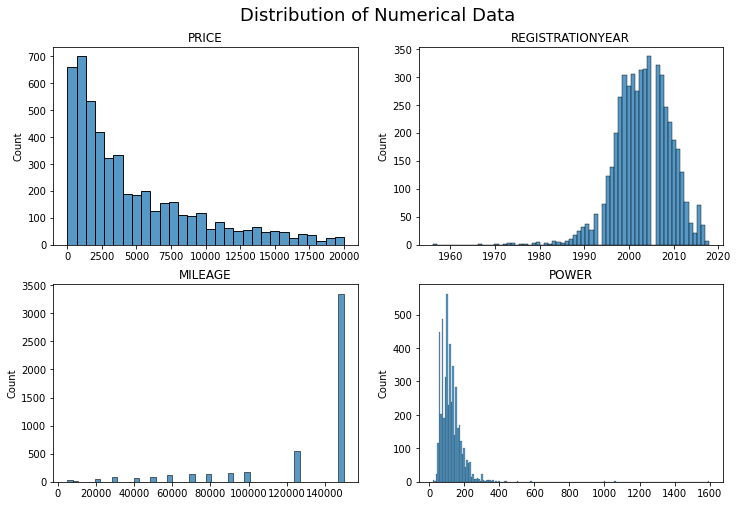

In [39]:
# display the distribution of continues columns
numerical = ['price', 'registrationyear', 'mileage', 'power']

plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.2)
plt.suptitle('Distribution of Numerical Data', fontsize=18, y=0.95)

# number of columns
ncols = 2
# number of rows
nrows = len(numerical) // ncols + (len(numerical) % ncols > 0)

# length of tickers and keep track of index
for n, cont in enumerate(numerical):
    # add new subplot using rows and cols
    ax = plt.subplot(nrows, ncols, n + 1)

    # filter df and plot ticker on new subplot axis
    sns.histplot(data=df_new, x=df_new[cont].sample(5000), ax=ax)

    # chart formatting
    ax.set_title(cont.upper())
    ax.set_xlabel('')

plt.show()

**Findings :**
- Zero prices of the cars has the second lead of total, maybe the seller make a bid from zero
- Almost total of the cars have more than 140.000 mileages
- There are some missing value in 2 years of registration that caused by dischraging some oddity value
- The average cars have around 10 to 300 of HP from total

#### Categorical Data

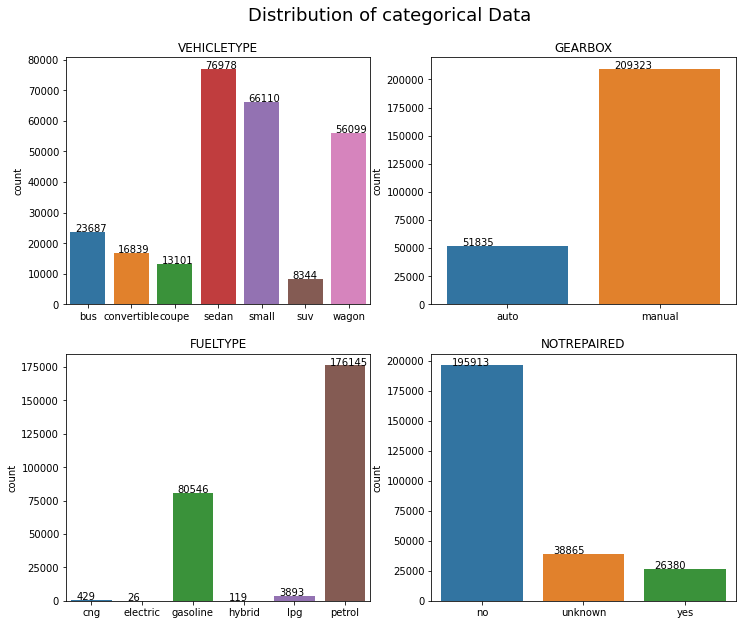

In [40]:
categorical = ['vehicletype', 'gearbox', 'fueltype', 'notrepaired']

plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.2)
plt.suptitle('Distribution of categorical Data', fontsize=18, y=0.95)

# number of columns
ncols = 2
# number of rows
nrows = len(categorical) // ncols + (len(categorical) % ncols > 0)

# length of tickers and keep track of index
for n, cat in enumerate(categorical):
    # add new subplot using rows and cols
    ax = plt.subplot(nrows, ncols, n + 1)

    # filter df and plot ticker on new subplot axis
    splot = sns.countplot(data=df_new, x=df_new[cat].sort_values(), ax=ax)
    for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+100))
    # chart formatting
    ax.set_title(cat.upper())
    ax.set_xlabel('')

plt.show()

**Findings :**
- Sedan, small cars, and wagon have the biggest number in sales respectively
- The different between auto and manual cars is quite far by around 150.000 of total cars
- Petrol and gasoline must be leading in fuel type of the cars
- Many people didn't repaired the car before they sell it

## Data Encoding for Modelling

In [41]:
# pick categorical data
categoric = ['model', 'brand', 'fueltype', 'vehicletype', 'gearbox', 'notrepaired']

### One-Hot Encoding

In [42]:
# dataset for OHE
df_ohe= pd.get_dummies(df_new)

In [43]:
df_ohe.head()

,price,registrationyear,power,mileage,registrationmonth,vehicletype_bus,vehicletype_convertible,vehicletype_coupe,vehicletype_sedan,vehicletype_small,...,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notrepaired_no,notrepaired_unknown,notrepaired_yes
1,18300,2011,190.0,125000,5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9800,2004,163.0,125000,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1500,2001,75.0,150000,6,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,3600,2008,69.0,90000,7,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,650,1995,102.0,150000,10,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Ordinal Encoding

In [44]:
# dataset for OE
df_oe = df_new.copy()
df_oe[categoric] = OrdinalEncoder().fit_transform(df[categoric])
df_oe.head()

,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired
1,18300,2.0,2011,1.0,190.0,29.0,125000,5,2.0,1.0,2.0
2,9800,5.0,2004,0.0,163.0,117.0,125000,8,2.0,14.0,1.0
3,1500,4.0,2001,1.0,75.0,116.0,150000,6,5.0,37.0,0.0
4,3600,4.0,2008,1.0,69.0,101.0,90000,7,2.0,31.0,0.0
5,650,3.0,1995,1.0,102.0,11.0,150000,10,5.0,2.0,2.0


### Split Data into Train-Valid-Test Data

In [47]:
idx_train_valid, idx_test = train_test_split(df_oe.index, test_size=0.2, random_state=12345)
idx_train, idx_valid = train_test_split(idx_train_valid, test_size = 0.3, random_state=12345)

# train-valid-test data for ordinal encoding
df_oe_train =df_oe.loc[idx_train]
df_oe_valid =df_oe.loc[idx_valid]
df_oe_test =df_oe.loc[idx_test]

# train-valid-test data for one-hot encoding
df_ohe_train = df_ohe.loc[idx_train]
df_ohe_valid = df_ohe.loc[idx_valid]
df_ohe_test = df_ohe.loc[idx_test]

# check data length
print(df_oe_train.shape, df_oe_valid.shape, df_oe_test.shape)
print(df_ohe_train.shape, df_ohe_valid.shape, df_ohe_test.shape)

(146248, 11) (62678, 11) (52232, 11)
(146248, 310) (62678, 310) (52232, 310)


In [48]:
# features-target for ordinal encoding
features_oe_train = df_oe_train.drop(['price'], axis=1)
target_oe_train =df_oe_train['price']
features_oe_valid = df_oe_valid.drop(['price'], axis=1)
target_oe_valid =df_oe_valid['price']
features_oe_test = df_oe_test.drop(['price'], axis=1)
target_oe_test =df_oe_test['price']

# features-target for one-hot encoding

features_ohe_train = df_ohe_train.drop(['price'], axis=1)
target_ohe_train =df_ohe_train['price']
features_ohe_valid = df_ohe_valid.drop(['price'], axis=1)
target_ohe_valid =df_ohe_valid['price']
features_ohe_test = df_ohe_test.drop(['price'], axis=1)
target_ohe_test =df_ohe_test['price']

**Findings :**
- New dataset of OHE contain 303 new columns and 5 rows
- The categoric data were chose to transform into numerical data in Ordinal Encoding

## Model Training and Analysis

Best result of predicting the price and take the least time to train and analyze is the most important for this step. The model has different dataset which act as a reference, such as dataset from One-Hot Encoding or Ordinal Encoding.

### Linear Regression (Sanity Check)

In [50]:
%%time

# train the model
lr = LinearRegression()  
lr.fit(features_ohe_train, target_ohe_train)

# prediction
pred_train_ohe_lr = lr.predict(features_ohe_train)
pred_valid_ohe_lr = lr.predict(features_ohe_valid)
pred_test_ohe_lr = lr.predict(features_ohe_test)

CPU times: user 9.95 s, sys: 4.66 s, total: 14.6 s
Wall time: 14.6 s


In [51]:
def rmse(a, b):
    return mean_squared_error(a, b)**0.5

print('RMSE Valid:', rmse(target_ohe_train, pred_train_ohe_lr))
print('RMSE Train:', rmse(target_ohe_valid, pred_valid_ohe_lr))
print('RMSE Test:', rmse(target_ohe_test, pred_test_ohe_lr))

RMSE Valid: 2623.584020983059
RMSE Train: 2638.7745113919686
RMSE Test: 2612.8983689148017


### Random Forest

In [52]:
%%time

random_forest = []

for depth_rf in range(1, 11):
    for est_rf in range(10, 51, 10):
        rfr = RandomForestRegressor(max_depth=depth_rf, n_estimators=est_rf, random_state=12345)
        rfr.fit(features_oe_train, target_oe_train)
    
        y_pred_train_rf = rfr.predict(features_oe_train)
        y_pred_valid_rf = rfr.predict(features_oe_valid)
    
        train_rf_rmse = rmse(target_oe_train, y_pred_train_rf)
        valid_rf_rmse = rmse(target_oe_valid, y_pred_valid_rf)
    
        random_forest.append({'max_depth': depth_rf, 'n_estimators': est_rf, 'train_rmse': train_rf_rmse, 'valid_rmse': valid_rf_rmse})

df = pd.DataFrame(random_forest)
df

CPU times: user 4min 18s, sys: 199 ms, total: 4min 18s
Wall time: 4min 18s


,max_depth,n_estimators,train_rmse,valid_rmse
0,1,10,3619.536932,3645.030771
1,1,20,3619.530599,3645.055213
2,1,30,3619.530463,3645.056503
3,1,40,3619.530726,3645.053602
4,1,50,3619.530598,3645.054778
5,2,10,3162.573130,3185.882407
6,2,20,3162.278847,3185.557404
7,2,30,3162.367218,3185.678194
8,2,40,3162.277363,3185.572637
9,2,50,3162.123672,3185.401299


In [62]:
%%time

# RMSE for test data for best hyperparameter (depth=10, estimator=50)

rfr_test = RandomForestRegressor(max_depth=10, n_estimators=50, random_state=12345)
rfr_test.fit(features_oe_train, target_oe_train)

y_pred_test_rf = rfr_test.predict(features_oe_test)
test_rf_rmse = rmse(target_oe_test, y_pred_test_rf)

print('Test RMSE :', test_rf_rmse)

Test RMSE : 1856.2414955012732
CPU times: user 13.7 s, sys: 13.2 ms, total: 13.7 s
Wall time: 13.9 s


### XGBoost

In [53]:
%%time

xgboost = []

for depth_xgb in range(1,6):
    xgbo = xgb.XGBRegressor(objective='reg:squarederror', max_depth=depth_xgb)
    xgbo.fit(features_ohe_train.to_numpy(), target_ohe_train.to_numpy())
    
    y_pred_train_xgb = xgbo.predict(features_ohe_train.to_numpy())
    y_pred_valid_xgb = xgbo.predict(features_ohe_valid.to_numpy())
    
    train_xgb_rmse = rmse(target_ohe_train.to_numpy(), y_pred_train_xgb)
    valid_xgb_rmse = rmse(target_ohe_valid.to_numpy(), y_pred_valid_xgb)
    
    xgboost.append({'max_depth': depth_xgb, 'train_rmse': train_xgb_rmse, 'valid_rmse': valid_xgb_rmse})

df = pd.DataFrame(xgboost)
df

CPU times: user 12min 37s, sys: 3.13 s, total: 12min 40s
Wall time: 12min 41s


,max_depth,train_rmse,valid_rmse
0,1,2202.039184,2223.859092
1,2,1870.805724,1903.683710
2,3,1745.388086,1795.021579
3,4,1673.045606,1743.265730
4,5,1603.949561,1705.944278


In [65]:
%%time

# RMSE for test data for best hyperparameter (depth=5)

xgbo_test = xgb.XGBRegressor(objective='reg:squarederror', max_depth=5)
xgbo_test.fit(features_ohe_train.to_numpy(), target_ohe_train.to_numpy())

y_pred_test_xgb = xgbo_test.predict(features_ohe_test.to_numpy())
test_xgb_rmse = rmse(target_ohe_test.to_numpy(), y_pred_test_xgb)

print('Test RMSE :', test_xgb_rmse)

Test RMSE : 1667.6964774057071
CPU times: user 3min 43s, sys: 574 ms, total: 3min 44s
Wall time: 3min 44s


### CatBoost

In [58]:
%%time

catboost = []

for depth_cbo in range(1,6):
    for iterations in range(50, 101, 10):
        cbo = cb.CatBoostRegressor(loss_function='RMSE', 
                                   depth=depth_cbo,  
                                   iterations=iterations, 
                                   random_seed=12345)
        cbo.fit(features_oe_train, target_oe_train, verbose=False)

        y_pred_train_cbo = cbo.predict(features_oe_train)
        y_pred_valid_cbo = cbo.predict(features_oe_valid)

        train_cbo_rmse = rmse(target_oe_train, y_pred_train_cbo)
        valid_cbo_rmse = rmse(target_oe_valid, y_pred_valid_cbo)

        catboost.append({'depth': depth_cbo, 'iterations': iterations, 'train_rmse': train_cbo_rmse, 'valid_rmse': valid_cbo_rmse})

df = pd.DataFrame(catboost)
df

CPU times: user 56 s, sys: 184 ms, total: 56.1 s
Wall time: 58.8 s


,depth,iterations,train_rmse,valid_rmse
0,1,50,2325.487927,2342.384480
1,1,60,2300.571156,2317.637367
2,1,70,2281.440693,2297.978159
3,1,80,2266.167777,2283.923347
4,1,90,2252.998175,2270.467277
5,1,100,2240.592243,2258.217183
6,2,50,1968.535611,2000.796371
7,2,60,1936.362201,1968.893589
8,2,70,1917.242872,1951.719338
9,2,80,1893.134496,1929.343390


In [66]:
%%time

# RMSE for test data for best hyperparameter (depth=5, iterations=100)

cbo_test = cb.CatBoostRegressor(loss_function='RMSE', 
                                   depth=5,  
                                   iterations=100, 
                                   random_seed=12345)
cbo_test.fit(features_oe_train, target_oe_train, verbose=False)

y_pred_test_cbo = cbo_test.predict(features_oe_test)
test_cbo_rmse = rmse(target_oe_test, y_pred_test_cbo)

print('Test RMSE :', test_cbo_rmse)

Test RMSE : 1682.0660378552097
CPU times: user 2.99 s, sys: 12.2 ms, total: 3.01 s
Wall time: 3.14 s


### LightGBM

In [71]:
%%time

lightgbm = []

for depth_lgb in range(1, 6):
    for leave in range(10, 41, 10):
        lgb = lgbm.LGBMRegressor(objective='rmse', num_leaves=leave, max_depth=depth_lgb)
        lgb.fit(features_oe_train, target_oe_train, categorical_feature=categoric)
    
        y_pred_train_lgbm = lgb.predict(features_oe_train)
        y_pred_valid_lgbm = lgb.predict(features_oe_valid)
    
        train_lgbm_rmse = rmse(target_oe_train, y_pred_train_lgbm)
        valid_lgbm_rmse = rmse(target_oe_valid, y_pred_valid_lgbm)
    
        lightgbm.append({'depth': depth_lgb, 'num_leaves': leave, 'train_rmse': train_lgbm_rmse, 'valid_rmse': valid_lgbm_rmse})

df = pd.DataFrame(lightgbm)
df

CPU times: user 1min 21s, sys: 252 ms, total: 1min 21s
Wall time: 1min 21s


,depth,num_leaves,train_rmse,valid_rmse
0,1,10,2298.022111,2323.229624
1,1,20,2298.022111,2323.229624
2,1,30,2298.022111,2323.229624
3,1,40,2298.022111,2323.229624
4,1,50,2298.022111,2323.229624
5,2,10,1893.401872,1921.982368
6,2,20,1893.401872,1921.982368
7,2,30,1893.401872,1921.982368
8,2,40,1893.401872,1921.982368
9,2,50,1893.401872,1921.982368


In [75]:
%%time

# RMSE for test data for best hyperparameter (depth=5, iterations=100)

lgb_test = lgbm.LGBMRegressor(objective='rmse', num_leaves=40, max_depth=5)
lgb_test.fit(features_oe_train, target_oe_train, categorical_feature=categoric)

y_pred_test_lgbm = lgb_test.predict(features_oe_test)
test_lgbm_rmse = rmse(target_oe_test, y_pred_test_lgbm)

print('Test RMSE :', test_lgbm_rmse)

Test RMSE : 1644.4389490292492
CPU times: user 3.06 s, sys: 11.7 ms, total: 3.07 s
Wall time: 2.99 s


## Conclusion

1. **Data Preparation**
 - Some columns had null data, further checking is required
 - The lowest price of a car was 0, with 0 HP and 1000 registration year, which is impossible or the previous owner forget about an information of a car
 - The highest price of a car was 20.000, with 20.000 HP, and 9999 registration year. it's probably error while loading data
 - Some columns need to be discharged such as number of pictures that has no number
- Oddity Value
 - Power that has value 0 replaced by NaN values, while value of >1600 and <10 HP had been discharged
 - Registration year which contain value of >2025 and <1900 will  had been discharged
 - Columns that have value 'other' replaced to NaN values
- Missing Value
 - Groupby data of each other that have correlation with the column that consist missing value and made the ratio of missing value from 31% to 9% from total data
 - Missing value in 'not repaired' replaced by unknown
- Data Distribution
 - Zero prices of the cars had the second lead of total, maybe the seller made a bid from zero
 - Almost total of the cars had more than 140.000 mileages
 - There were some missing value in 2 years of registration that caused by dischraging some oddity value
 - The average cars had around 10 to 300 of HP from total
 - Sedan, small cars, and wagon had the biggest number in sales respectively
 - The different between auto and manual cars was quite far by around 150.000 of total cars
 - Petrol and gasoline must be leading in fuel type of the cars
 - Many people didn't repaired the car before they sold it
 
2. **Data Encoding**
- New dataset of OHE contained 303 new columns and 5 rows
- The categoric data were chose to transform into numerical data in Ordinal Encoding

3. **Model Training and Analysing**
- Random Forest need 4 minutes in total to train the model, set the range of parameter depth and estimator still not generate the best result among the other model.
- XGBoost take up to 12 min to train the model for just a few parameters, considering the data used is OHE which has more than 300 columns.
- LightGBM with range of parameters in depth and num_leaves takes about 1 minutes to train the model and the result almost the same with Random Forest for the best result
- CatBoost has least time taken to train the model which is 56 seconds, considering the dataset has a number of categorical data and CatBoost has the advantage for that.

***Main Conclusion***
- The best result for overall with the least time to train the model and the best RMSE produced by LightGBM that takes 1 minutes 21 seconds for the train and valid data, while takes about 3 seconds for test data. The result of RMSE was the best among the other model which is only 1644 for test data with parameter of depth = 5 and num_leaves = 40